## machine learning--regression analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv("height weight.csv")
df.head()
#here weight is the independent variable and the height is the dependent variable though one independent variable is there 
#so we draw the best fit line by the simple linear regression

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


<AxesSubplot: xlabel='weight', ylabel='height'>

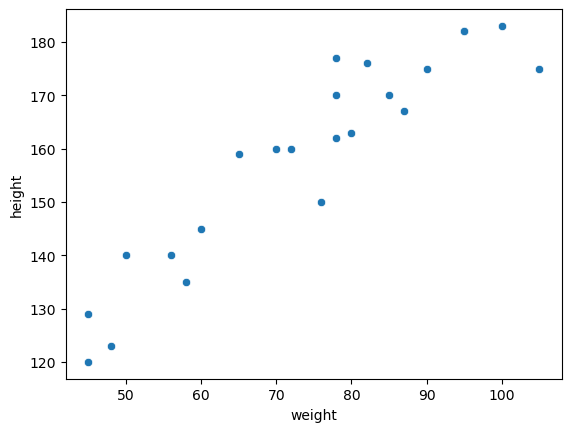

In [7]:
import seaborn as sns
sns.scatterplot(x=df["weight"],y=df["height"],data=df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  23 non-null     int64
 1   height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [9]:
df.describe()

,weight,height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [10]:
#check the missing value is present or not
df.isnull().sum()
#no null value is present

weight    0
height    0
dtype: int64

In [11]:
##divide our  dataset into independent and dependent feature
x=df[["weight"]]  ##independent feature should be 2d array
y=df["height"] #dependent feature

In [12]:
x.shape,y.shape

((23, 1), (23,))

In [13]:
##further devide the dataset into train and test datasets
##look at the sklearn library for  splitting train and tesst dataset
##sklearn train and test split--Split arrays or matrices into random train and test subsets

In [14]:
from sklearn.model_selection import  train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [16]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

In [17]:
y_train.shape,y_test.shape

((18,), (5,))

In [18]:
#standardisation --use sklearn standard scalar

In [19]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [16]:
#we use fit_tranform on the train data only
x_train=scalar.fit_transform(x_train)

In [17]:
x_test=scalar.transform(x_test)

In [18]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

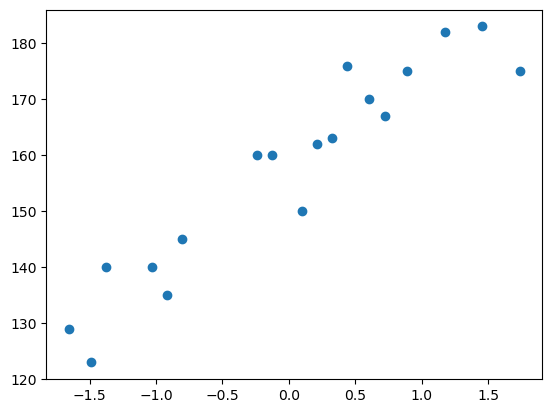

In [19]:
#we draw a scatterplot between the x_train and Y_TRAIN
plt.scatter(x_train,y_train)

In [20]:
#after standard scaling the range is frm -1.5 to 1.5

In [21]:
#take any random point we want to standrised it
scalar.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

## model training

In [22]:
##sklearn linear regression---


In [23]:
#model trainin


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
regressor=LinearRegression()

In [20]:
#training the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
regressor.intercept_

85.96709053063559

In [22]:
regressor.coef_

array([0.9630459])

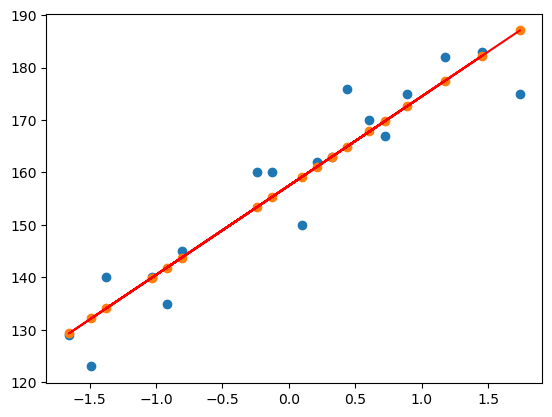

In [32]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),"r")
plt.scatter(x_train,regressor.predict(x_train))

## prediction for the test data

In [34]:
y_pred_test=regressor.predict(x_test)

In [35]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: height, dtype: int64

In [37]:
###for to check the accuracy of the model we use preformance matrix
#   performance matrix--mae,mse,rmse

## performance matrix

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [40]:
## accuracy of the model

In [41]:
#accuracy of the model is found by r squared and adjusted r squared

#r squared
formula

**R^2=1-SSR/SST**


--R^2=accuracy
--SSR=ssum of square of the residual
--SST=total sum of square


#search sklearn rsquared

In [42]:
from sklearn.metrics import r2_score

In [44]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [45]:
#we found the accuracy 70 perccent

In [46]:
#display adjusted r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [47]:
scalar

StandardScaler()

In [48]:
regressor

LinearRegression()